In [1]:
import numpy as np
import scipy.signal as ss
from PIL import Image as Img
import matplotlib.pyplot as plt
import cv2
import math

In [2]:
def createDataset(img):
    r = np.shape(img)[0]
    c = np.shape(img)[1]
    features = np.asarray([np.reshape(img[:,:,0], r*c),np.reshape(img[:,:,1], r*c),np.reshape(img[:,:,2], r*c)]).astype(int)
    return np.flip(np.transpose(features),0)

In [3]:
def kMeansCluster(features, centers):
    dist = np.zeros((np.shape(features)[0], 7))
    idx = np.zeros(np.shape(features)[0])
    for i in range(100):
        for j in range(7):
            dist[:,j] = np.linalg.norm(features-centers[j], axis = 1)
        idx = np.argmin(dist, axis=1)
        
        for j in range(7):
            assign = np.argwhere(idx == j)
            sum = []
            for id in assign:
                i = id[0]
                sum.append(features[i, :])
            centers[j,:] = np.mean(sum, axis = 0)
            
    return idx, centers

In [4]:
def mapValues(im, idx, centers):
    idxrsp = np.reshape(idx, (np.shape(im)[0], np.shape(im)[1]))
    ret = np.zeros_like(im)
    max = 0
    for i in range(np.shape(im)[0]):
        for j in range(np.shape(im)[1]):
            ret[i][j] = centers[idxrsp[i][j]]
            if idxrsp[i][j]>max:
                max = idxrsp[i][j]
    return ret

In [5]:
np.random.seed(4)
img = np.asarray(Img.open('white-tower.png'))
features = createDataset(img)
cent = np.random.randint(np.shape(features)[0], size=7)
centers = features[cent, :]
idx, centers = kMeansCluster(features, centers)

In [6]:
output = mapValues(img, idx, centers)

(720, 1280, 3) (921600,) (921600, 3)


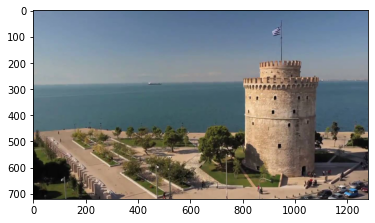

In [7]:
im1 = np.asarray(Img.open('white-tower.png'))
plt.imshow(im1)


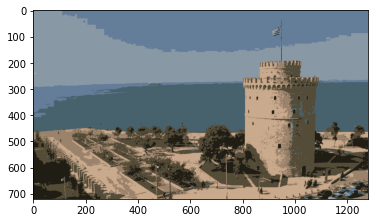

In [13]:
output = np.flip(output, 1)
plt.imshow(output)

In [14]:
print(centers)

[[ 85  76  56]
 [ 72  98 109]
 [ 32  29  21]
 [137 152 165]
 [100 125 153]
 [155 130 107]
 [202 170 141]]
